In [ ]:
# Building a small convnet
from keras import models
from keras import layers
from keras import optimizers
import numpy as np

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.Flatten())
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

In [ ]:
# Using the ImageDataGenerator to input images
from keras.preprocessing.image import ImageDataGenerator
import os

train_dir = '/content/drive/MyDrive/train/'
validation_dir = '/content/drive/MyDrive/validation/'

#rescaling the images to 0 to 1
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory(
    train_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

validation_generator = test_datagen.flow_from_directory(
    validation_dir,
    target_size=(150,150),
    batch_size=20,
    class_mode='binary'
)

Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [ ]:
for data_batch, labels_batch in train_generator:
  print('data batch shape:', data_batch.shape)
  print('labels batch shape:', labels_batch.shape)
  break

data batch shape: (20, 150, 150, 3)
labels batch shape: (20,)


In [ ]:
#Training the convnet
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=30,
                              validation_data=validation_generator,
                              validation_steps=50)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/30
100/100 [==============================] - 729s 7s/step - loss: 0.7202 - accuracy: 0.4877 - val_loss: 0.6570 - val_accuracy: 0.6160
Epoch 2/30
100/100 [==============================] - 11s 109ms/step - loss: 0.6313 - accuracy: 0.6573 - val_loss: 0.6209 - val_accuracy: 0.6560
Epoch 3/30
100/100 [==============================] - 11s 108ms/step - loss: 0.5535 - accuracy: 0.7116 - val_loss: 0.5924 - val_accuracy: 0.6940
Epoch 4/30
100/100 [==============================] - 11s 109ms/step - loss: 0.5239 - accuracy: 0.7431 - val_loss: 0.5680 - val_accuracy: 0.7180
Epoch 5/30
100/100 [==============================] - 11s 108ms/step - loss: 0.4802 - accuracy: 0.7713 - val_loss: 0.5763 - val_accuracy: 0.7100
Epoch 6/30
100/100 [==============================] - 11s 108ms/step - loss: 0.4435 - accuracy: 0.7984 - val_loss: 0.6543 - val_accuracy: 0.6610
Epoch 7/30
100/100 [==============================] - 11s 109ms/step - loss: 0.4001 - accuracy: 0.8257 - val_loss: 0.5824 - val_accu

In [ ]:
model.save('/content/drive/MyDrive/cats_dogs_small_1.h5')

3


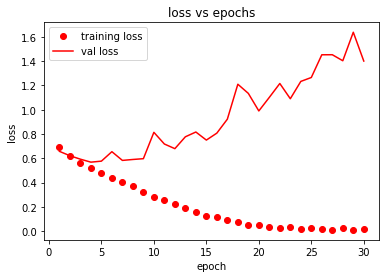

In [ ]:
# Plotting the loss
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,30+1)
print(len('acc'))
plt.plot(epochs,loss,'ro',label='training loss')
plt.plot(epochs,val_loss,'r',label='val loss')
plt.title('loss vs epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

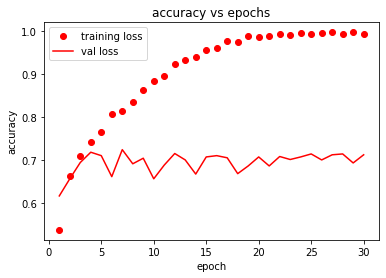

In [ ]:
#Plotting the accuracy. We see that the validation accuracy is quite low - around 70%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,30+1)

plt.plot(epochs,acc,'ro',label='training loss')
plt.plot(epochs,val_acc,'r',label='val loss')
plt.title('accuracy vs epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
#Inorder to improve the accuracy, we use image augmentation - increase the number of images in the dataset
datagen = ImageDataGenerator(
    rotation_range=40,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=0.2,
    horizontal_flip=True,
    fill_mode='nearest'
)

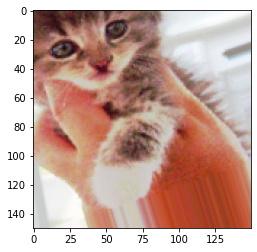

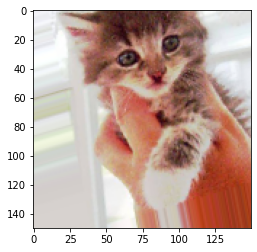

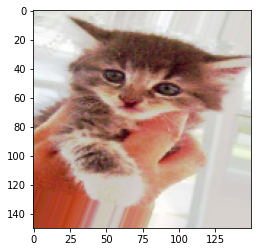

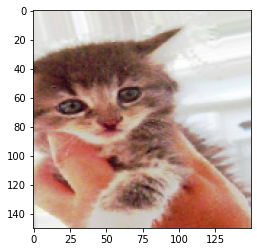

In [ ]:
#Visualizing augmentation on an image 
import os
import matplotlib.pyplot as plt
from keras.preprocessing import image
fnames = [os.path.join('/content/drive/MyDrive/train/cats',fname) for fname in os.listdir('/content/drive/MyDrive/train/cats/')]
image_path = fnames[3]
img = image.load_img(image_path,target_size=(150,150))
x = image.img_to_array(img)
x = x.reshape((1,)+x.shape)
i = 0
for batch in datagen.flow(x,batch_size=1):
  plt.figure(i)
  imgplot = plt.imshow(image.array_to_img(batch[0]))
  i+=1
  if i%4==0:
    break

In [ ]:
#improving the accuracy of the model using data augmentation and drop out layer

model = models.Sequential()
model.add(layers.Conv2D(32,(3,3),activation='relu',input_shape=(150,150,3)))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(64,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(3,3),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Conv2D(128,(2,2),activation='relu'))
model.add(layers.MaxPooling2D(2,2))
model.add(layers.Flatten())
model.add(layers.Dropout(0.5))
model.add(layers.Dense(512,activation='relu'))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(loss = 'binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-4),
              metrics=['accuracy'])

In [ ]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
validation_datagen = ImageDataGenerator(rescale=1./255)

train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/train/',
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/validation/',
                                                    target_size=(150,150),
                                                    batch_size=20,
                                                    class_mode='binary')

history=model.fit_generator(train_generator,
                    steps_per_epoch=100,
                    epochs=100,
                    validation_data = validation_generator,
                    validation_steps=50)
model.save('/content/drive/MyDrive/cats_dogs_small_2.h5')

Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 904s 9s/step - loss: 0.6957 - accuracy: 0.4944 - val_loss: 0.6916 - val_accuracy: 0.5920
Epoch 2/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6919 - accuracy: 0.5276 - val_loss: 0.6904 - val_accuracy: 0.5000
Epoch 3/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6897 - accuracy: 0.5367 - val_loss: 0.6829 - val_accuracy: 0.5930
Epoch 4/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6815 - accuracy: 0.5600 - val_loss: 0.7002 - val_accuracy: 0.5100
Epoch 5/100
100/100 [==============================] - 19s 187ms/step - loss: 0.6797 - accuracy: 0.5691 - val_loss: 0.6668 - val_accuracy: 0.5990
Epoch 6/100
100/100 [==============================] - 19s 186ms/step - loss: 0.6687 - accuracy: 0.5861 - val_loss: 0.6576 - val_accuracy: 0.6230
Epoch 7/100
100/100 [==============================] - 19s 185ms/step - loss: 0.6692 - accuracy: 0.5780 - val_loss: 0.6501 - v

3


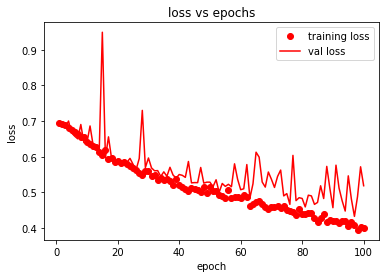

In [ ]:
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,100+1)
print(len('acc'))
plt.plot(epochs,loss,'ro',label='training loss')
plt.plot(epochs,val_loss,'r',label='val loss')
plt.title('loss vs epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

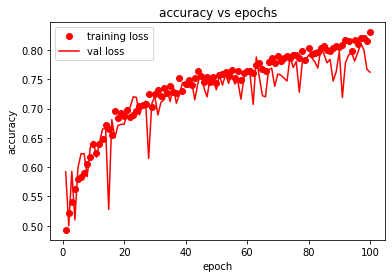

In [ ]:
#Validation accuracy improves to around 80%
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,100+1)

plt.plot(epochs,acc,'ro',label='training loss')
plt.plot(epochs,val_acc,'r',label='val loss')
plt.title('accuracy vs epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
# Another technique to increase the accuracy even further is by using a pretrained model like VGG etc
from keras.applications import VGG16
import numpy as np

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))
#conv_base.summary()

# Feature extraction without augmentation
from keras.preprocessing.image import ImageDataGenerator

datagen = ImageDataGenerator(rescale=1./255) 
""",
                             rotation_range=40,
                             width_shift_range=0.2,
                             height_shift_range=0.2,
                             shear_range=0.2,
                             zoom_range=0.2,
                             horizontal_flip=True)
"""

batch_size=20
def feature_extractor(directory,sample_count):
  features = np.zeros(shape=(sample_count,4,4,512))
  labels = np.zeros(shape=(sample_count))
  generator = datagen.flow_from_directory(
                              directory,
                              target_size=(150,150),
                              batch_size=batch_size,
                              class_mode='binary')
  i = 0
  for inputs_batch,labels_batch in generator:
    features_batch = conv_base.predict(inputs_batch) 
    features[i*batch_size:(i+1)*batch_size] = features_batch
    labels[i*batch_size:(i+1)*batch_size] = labels_batch
    i+=1
    if(i*batch_size)>=sample_count:
      break
    return features,labels


test_features,test_labels = feature_extractor('/content/drive/MyDrive/test/',1000)

  

Found 1008 images belonging to 2 classes.


In [ ]:
train_features,train_labels = feature_extractor('/content/drive/MyDrive/train/',2000)

Found 2010 images belonging to 2 classes.


In [ ]:
validation_features,validation_labels = feature_extractor('/content/drive/MyDrive/validation/',1000)

Found 1000 images belonging to 2 classes.


In [ ]:
#extracted features need to be reshaped from (sample_count,4,4,512) to (sample_count,8192)
train_features = np.reshape(train_features,(2000,4*4*512))
validation_features = np.reshape(validation_features,(1000,4*4*512))

In [ ]:
#build the top layer model only that needs to be retrained
from keras import models
from keras import layers
from keras import optimizers

model = models.Sequential()
model.add(layers.Dense(256,activation='relu',input_dim=4*4*512))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(1,activation='sigmoid'))

model.compile(optimizer=optimizers.RMSprop(lr=1e-4),
              loss='binary_crossentropy',
              metrics=['accuracy'])

history = model.fit(train_features,train_labels,
                    batch_size=20,
                    epochs=30,
                    validation_data=(validation_features,validation_labels))

Epoch 1/30
100/100 [==============================] - 2s 11ms/step - loss: 0.6897 - accuracy: 0.9938 - val_loss: 0.6876 - val_accuracy: 0.9860
Epoch 2/30
100/100 [==============================] - 1s 6ms/step - loss: 0.6643 - accuracy: 0.9933 - val_loss: 0.6516 - val_accuracy: 0.9860
Epoch 3/30
100/100 [==============================] - 1s 6ms/step - loss: 0.6282 - accuracy: 0.9986 - val_loss: 0.6036 - val_accuracy: 0.9920
Epoch 4/30
100/100 [==============================] - 1s 6ms/step - loss: 0.5888 - accuracy: 0.9996 - val_loss: 0.5723 - val_accuracy: 0.9860
Epoch 5/30
100/100 [==============================] - 1s 6ms/step - loss: 0.5505 - accuracy: 0.9998 - val_loss: 0.5421 - val_accuracy: 0.9860
Epoch 6/30
100/100 [==============================] - 1s 6ms/step - loss: 0.5073 - accuracy: 0.9991 - val_loss: 0.4868 - val_accuracy: 0.9880
Epoch 7/30
100/100 [==============================] - 1s 6ms/step - loss: 0.4578 - accuracy: 0.9998 - val_loss: 0.4433 - val_accuracy: 0.9880
Epoch

3


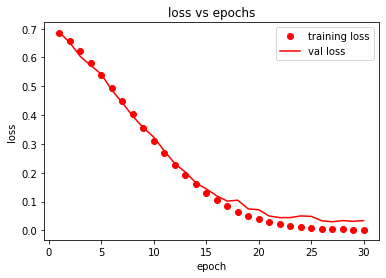

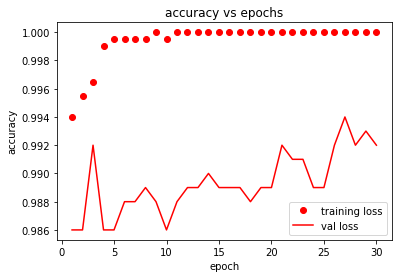

In [ ]:
#Plot for training with augmentaion
import matplotlib.pyplot as plt
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,30+1)
print(len('acc'))
plt.plot(epochs,loss,'ro',label='training loss')
plt.plot(epochs,val_loss,'r',label='val loss')
plt.title('loss vs epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.figure()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,30+1)

plt.plot(epochs,acc,'ro',label='training loss')
plt.plot(epochs,val_acc,'r',label='val loss')
plt.title('accuracy vs epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

3


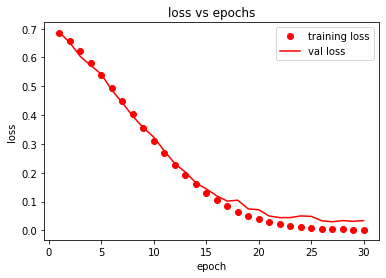

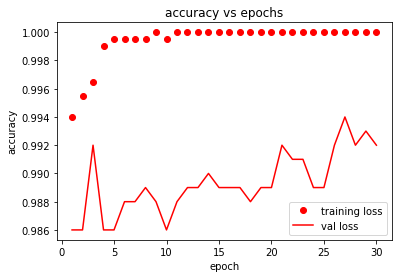

In [ ]:
#Plot for training without augmentation
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,30+1)
print(len('acc'))
plt.plot(epochs,loss,'ro',label='training loss')
plt.plot(epochs,val_loss,'r',label='val loss')
plt.title('loss vs epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.figure()

acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1,30+1)

plt.plot(epochs,acc,'ro',label='training loss')
plt.plot(epochs,val_acc,'r',label='val loss')
plt.title('accuracy vs epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [2]:
# Second type of feature extraction method involves runining the model end to end but freaze the conv_base
from keras import models
from keras import layers
from keras.applications import VGG16
import numpy as np

conv_base = VGG16(weights='imagenet',
                  include_top=False,
                  input_shape=(150,150,3))

model = models.Sequential()
model.add(conv_base)
model.add(layers.Flatten())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dense(1, activation='sigmoid'))

#Freaze
conv_base.trainable = False

#follow the same procedure for training involving the ImageDataGenerator

58892288/58889256 [==============================] - 1s 0us/step


In [3]:
from keras.preprocessing.image import ImageDataGenerator
from keras import optimizers
train_datagen = ImageDataGenerator(rescale=1./255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)
train_generator = train_datagen.flow_from_directory('/content/drive/MyDrive/train/',
                                                    target_size=(150, 150),
                                                    batch_size=20,
                                                    class_mode='binary')
validation_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/validation/',
                                                        target_size=(150, 150),
                                                        batch_size=20,
                                                        class_mode='binary')
model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=2e-5),
              metrics=['acc'])
history = model.fit_generator(train_generator,
                              steps_per_epoch=100,
                              epochs=100,
                              validation_data=validation_generator,
                              validation_steps=50)

Found 2010 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1844: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/100
100/100 [==============================] - 701s 7s/step - loss: 0.6313 - acc: 0.6410 - val_loss: 0.4291 - val_acc: 0.8220
Epoch 2/100
100/100 [==============================] - 20s 204ms/step - loss: 0.4859 - acc: 0.7786 - val_loss: 0.3643 - val_acc: 0.8350
Epoch 3/100
100/100 [==============================] - 21s 207ms/step - loss: 0.4436 - acc: 0.7990 - val_loss: 0.3355 - val_acc: 0.8650
Epoch 4/100
100/100 [==============================] - 20s 205ms/step - loss: 0.4099 - acc: 0.8123 - val_loss: 0.3134 - val_acc: 0.8640
Epoch 5/100
100/100 [==============================] - 20s 204ms/step - loss: 0.3936 - acc: 0.8177 - val_loss: 0.3045 - val_acc: 0.8720
Epoch 6/100
100/100 [==============================] - 21s 206ms/step - loss: 0.3529 - acc: 0.8481 - val_loss: 0.2883 - val_acc: 0.8780
Epoch 7/100
100/100 [==============================] - 20s 205ms/step - loss: 0.3582 - acc: 0.8329 - val_loss: 0.2908 - val_acc: 0.8760
Epoch 8/100
100/100 [=============================

3


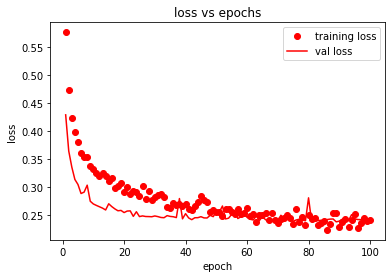

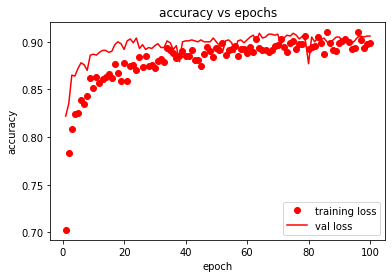

In [8]:
#Plot for training without augmentation
import matplotlib.pyplot as plt

loss = history.history['loss']
val_loss = history.history['val_loss']
epochs = range(1,100+1)
print(len('acc'))
plt.plot(epochs,loss,'ro',label='training loss')
plt.plot(epochs,val_loss,'r',label='val loss')
plt.title('loss vs epochs')
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend()

plt.figure()

acc = history.history['acc']
val_acc = history.history['val_acc']
epochs = range(1,100+1)

plt.plot(epochs,acc,'ro',label='training loss')
plt.plot(epochs,val_acc,'r',label='val loss')
plt.title('accuracy vs epochs')
plt.xlabel('epoch')
plt.ylabel('accuracy')
plt.legend()

In [ ]:
# You can also unfreeze few conv layers just above the dense layer and train them along with the dense layer
conv_base.trainable = True
set_trainable = False
for layer in conv_base.layers:
  if layer.name == 'block5_conv1':
    set_trainable = True
  if set_trainable:
    layer.trainable = True
  else:
    layer.trainable = False


model.compile(loss='binary_crossentropy',
              optimizer=optimizers.RMSprop(lr=1e-5),
              metrics=['acc'])

history = model.fit_generator(
    train_generator,
    steps_per_epoch=100,
    epochs=100,
    validation_data=validation_generator,
    validation_steps=50)

In [9]:
# Final model testing

#test_features = np.reshape(test_features,(1000,4*4*512)) - does not work as input to test_datagen 
test_generator = test_datagen.flow_from_directory('/content/drive/MyDrive/test/',
                                                  target_size=(150, 150),
                                                  batch_size=20,
                                                  class_mode='binary')
test_loss, test_acc = model.evaluate_generator(test_generator, steps=50)
print('test loss:', test_loss)

Found 1008 images belonging to 2 classes.


/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1877: UserWarning: `Model.evaluate_generator` is deprecated and will be removed in a future version. Please use `Model.evaluate`, which supports generators.
  warnings.warn('`Model.evaluate_generator` is deprecated and '


test loss: 0.24745510518550873


In [10]:
print('test acc:', test_acc)

test acc: 0.9039999842643738
